In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
train = ImageDataGenerator(rescale = 1.0/255)
validation = ImageDataGenerator(rescale = 1.0/255)

In [4]:
train_dataset = train.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset3/train",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
validation_dataset = validation.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset3/val",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 8790 images belonging to 2 classes.
Found 1120 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'BMR': 0, 'RASH': 1}

In [6]:
validation_dataset.class_indices

{'BMR': 0, 'RASH': 1}

In [7]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
validation_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
# Load the MobileNetV2 model with pretrained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the updated model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),  # Add dropout for regularization
    Dense(2, activation='softmax')  
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Initial learning rate
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)


lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(
    train_dataset,  
    validation_data=validation_dataset,  
    epochs=10,
    callbacks=[lr_scheduler]  # Added learning rate scheduler
)


Epoch 1/10


C:\Users\lamim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 68s 232ms/step - accuracy: 0.6755 - loss: 0.6337 - precision: 0.7329 - recall: 0.2453 - val_accuracy: 0.7795 - val_loss: 0.4900 - val_precision: 0.8808 - val_recall: 0.3036 - learning_rate: 0.0010
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 62s 226ms/step - accuracy: 0.8078 - loss: 0.4164 - precision: 0.8800 - recall: 0.3923 - val_accuracy: 0.8071 - val_loss: 0.4352 - val_precision: 0.9218 - val_recall: 0.3580 - learning_rate: 0.0010
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 63s 229ms/step - accuracy: 0.8383 - loss: 0.3648 - precision: 0.9054 - recall: 0.4441 - val_accuracy: 0.8304 - val_loss: 0.4145 - val_precision: 0.9287 - val_recall: 0.4071 - learning_rate: 0.0010
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 63s 228ms/step - accuracy: 0.8322 - loss: 0.3528 - precision: 0.9089 - recall: 0.4774 - val_accuracy: 0.8259 - val_loss: 0.4318 - val_precision: 0.9049 - val_recall: 0.4161 - learning_rate: 0.0010
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/ste

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize test images

test_dataset = test_datagen.flow_from_directory(
    "C:/Users/lamim/Desktop/N_Thesis/split_dataset3/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 1130 images belonging to 2 classes.


In [11]:
results = model.evaluate(test_dataset)  # Evaluate the test dataset
test_acc = results[1] 

print(f"Test Accuracy: {test_acc:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.7882 - loss: 0.4514 - precision: 0.8567 - recall: 0.5401
Test Accuracy: 0.7805


In [12]:
import tensorflow as tf
import numpy as np

# Print Model Summary
model.summary()

# Count Trainable and Non-Trainable Parameters
trainable_params = np.sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
non_trainable_params = np.sum([tf.keras.backend.count_params(w) for w in model.non_trainable_weights])

# Print Details
print("\n================ MODEL DETAILS ================")
print(f"Total Parameters: {trainable_params + non_trainable_params}")
print(f"Trainable Parameters: {trainable_params}")
print(f"Non-Trainable Parameters: {non_trainable_params}")
print(f"Number of Layers: {len(model.layers)}")
print("\n===============================================")

# Print Layer-wise Trainable Status
print("\nLayer-wise Trainability:")
for layer in model.layers:
    print(f"{layer.name}: Trainable = {layer.trainable}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,265,672 (8.64 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 5,126 (20.03 KB)


================ MODEL DETAILS ================
Total Parameters: 2260546
Trainable Parameters: 2562
Non-Trainable Parameters: 2257984
Number of Layers: 4


Layer-wise Trainability:
mobilenetv2_1.00_224: Trainable = False
global_average_pooling2d: Trainable = True
dropout: Trainable = True
dense: Trainable = True


In [13]:
results = model.evaluate(test_dataset)  # Evaluate the test dataset
test_acc = results[1] 

print(f"Test Accuracy: {test_acc:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.7882 - loss: 0.4514 - precision: 0.8567 - recall: 0.5401
Test Accuracy: 0.7805


36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step

Test Accuracy: 0.7805


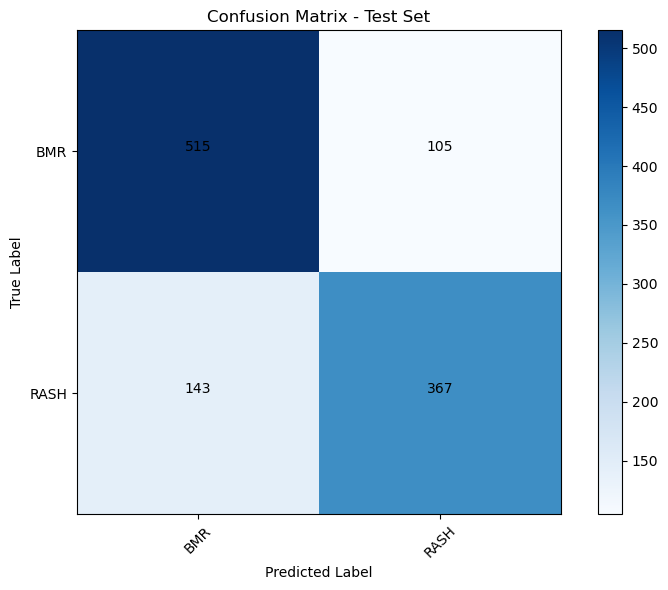


Classification Report - Test Set:
              precision    recall  f1-score   support

         BMR     0.7827    0.8306    0.8059       620
        RASH     0.7775    0.7196    0.7475       510

    accuracy                         0.7805      1130
   macro avg     0.7801    0.7751    0.7767      1130
weighted avg     0.7804    0.7805    0.7795      1130



In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(model, dataset, dataset_name="Validation"):
    """Evaluate the model and return true labels, predictions, and accuracy."""
    # Get true labels
    true_labels = dataset.classes

    # Get predictions
    predictions = model.predict(dataset)
    predicted_labels = np.argmax(predictions, axis=1)

    # Calculate accuracy
    accuracy = np.mean(predicted_labels == true_labels)
    print(f"\n{dataset_name} Accuracy: {accuracy:.4f}")

    return true_labels, predicted_labels

def plot_confusion_matrix(y_true, y_pred, class_names, dataset_name="Test"):
    """Plot a non-normalized confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    num_classes = len(class_names)

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {dataset_name} Set')
    plt.colorbar()

    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Display raw count values inside the confusion matrix
    thresh = cm.max() / 2.  # Threshold for text color contrast
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, f"{cm[i, j]}",  # Display raw count (integer)
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

def print_classification_report(y_true, y_pred, class_names, dataset_name="Test"):
    """Print classification report with precision, recall, and F1-score."""
    print(f"\nClassification Report - {dataset_name} Set:")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Get class names from the dataset
class_names = list(train_dataset.class_indices.keys())


# Evaluate on test set
test_labels, test_preds = evaluate_model(model, test_dataset, "Test")
plot_confusion_matrix(test_labels, test_preds, class_names, "Test")
print_classification_report(test_labels, test_preds, class_names, "Test")

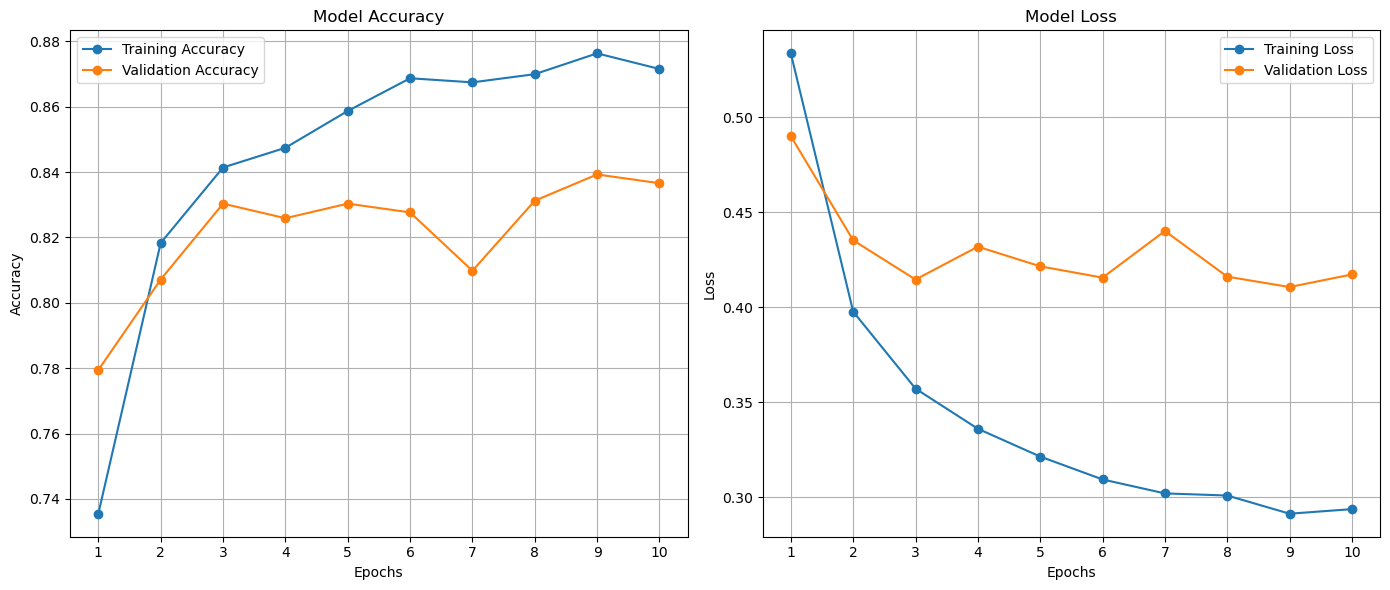

Plot saved to: C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_MobileNetV2_2\training_plot.png


In [16]:
import matplotlib.pyplot as plt
import os
import csv

#extracting history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

output_dir = "my_results"
os.makedirs(output_dir, exist_ok=True)

csv_path = os.path.join(output_dir, "training_log.csv")
with open(csv_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"])
    for epoch in epochs:
        writer.writerow([
            epoch,
            train_accuracy[epoch-1],
            val_accuracy[epoch-1],
            train_loss[epoch-1],
            val_loss[epoch-1]
        ])

# Plot
plt.figure(figsize=(14, 6))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid()

plt.tight_layout()
output_dir = r"C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_MobileNetV2_2"
os.makedirs(output_dir, exist_ok=True)

fig_path = os.path.join(output_dir, "training_plot.png")
plt.savefig(fig_path, dpi=300)
plt.show()

print(f"Plot saved to: {fig_path}")